#### Imports

In [195]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Data Load

In [196]:
df = pd.read_csv("data/Titanic-Dataset.csv")

#### Data Understanding

In [197]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
df.shape

(891, 12)

In [200]:
df.duplicated().sum()

0

In [201]:
nulls = df.isnull().sum()
percentage= (nulls.values / df.shape[0]) * 100
dfNulls= pd.DataFrame({
    "column_names": nulls.index,
    "null_quantity": nulls.values,
    "percentage": percentage.round(2)
})

dfNulls

,column_names,null_quantity,percentage
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,177,19.87
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,0,0.00


#### Data Cleaning

In [202]:
df.groupby("Sex")["Age"].describe().T

Sex,female,male
count,261.000000,453.000000
mean,27.915709,30.726645
std,14.110146,14.678201
min,0.750000,0.420000
25%,18.000000,21.000000
50%,27.000000,29.000000
75%,37.000000,39.000000
max,63.000000,80.000000


In [203]:
df.groupby("Sex")["Cabin"].describe().T

Sex,female,male
count,97,107
unique,75,96
top,G6,F2
freq,4,3


In [204]:
# Swapping N/A for Age's Average
df["Age"].fillna(df["Age"].mean(), inplace=True)

# dropping collumn Cabin
df.drop("Cabin", axis=1, inplace=True)

# dropping the remaining rows
df.dropna(inplace=True)

# Checking the current data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [234]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.000000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.000000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.000000,3.0,3.0000
Age,889.0,29.653446,12.968366,0.42,22.0000,29.699118,35.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.000000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.000000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.454200,31.0,512.3292


In [233]:
qdf.describe(include="object").T

,count,unique,top,freq
Name,889,889,"Braund, Mr. Owen Harris",1
Sex,889,2,male,577
Ticket,889,680,347082,7
Embarked,889,3,S,644


#### Analysis & Visualization

In [276]:
gender = df["Sex"].value_counts()
gender

Sex
male      577
female    312
Name: count, dtype: int64

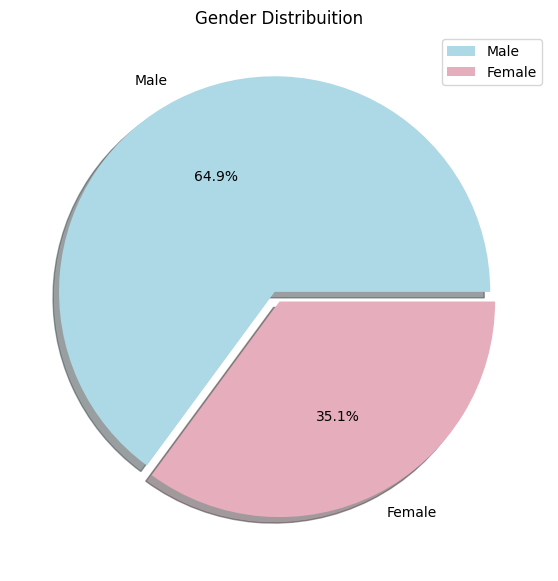

In [391]:
# Gender   
plt.figure(figsize=[7,7])
plt.pie(
    x= gender,  # returns in descendent order so [male_values, female_values]
    autopct="%.1f%%", # percentage
    labels= ["Male", "Female"], # labels 
    colors=["#add8e6", "#e6adbc"], # colors 
    explode= [0.05, 0], # spacing
    shadow= True, # shadow
    data=True
    )
plt.legend()
plt.title("Gender Distribuition")
plt.show()

In [354]:
pCalss= df["Pclass"].value_counts()
pCalss

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

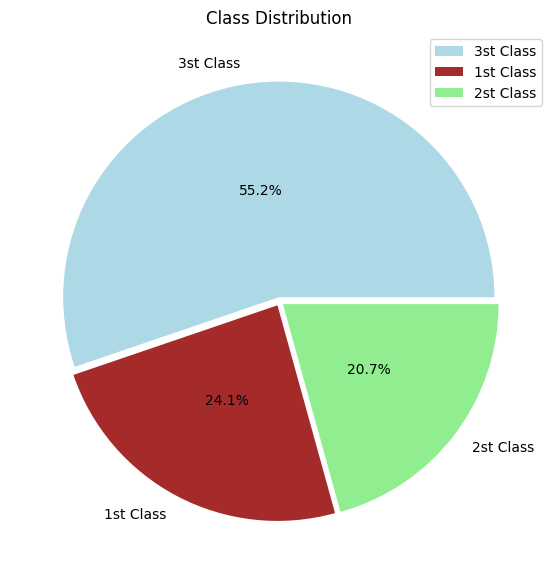

In [390]:
plt.figure(figsize=[7,7])

plt.pie(
    x= pCalss,
    labels= ["3st Class", "1st Class", "2st Class"],
    colors=["lightblue", "brown", "lightgreen"],
    explode=[0.02,0.02,0.02],
    autopct="%0.1f%%",
    pctdistance=0.5
)
plt.title("Class Distribution")
plt.legend()
plt.show()

In [ ]:
plt.hist()